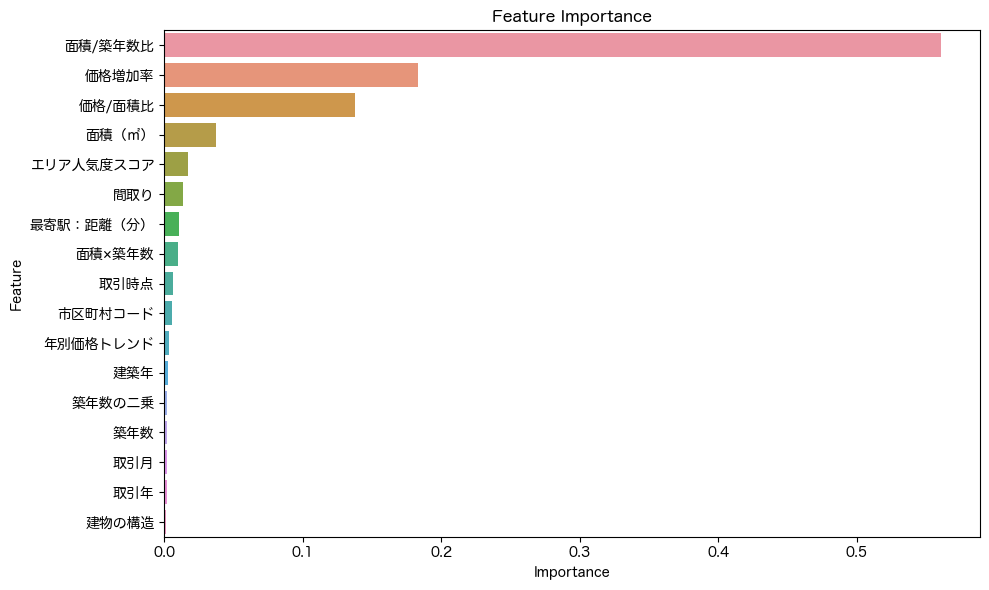

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/train/train_cleaned4/combined_data_21_24_25_29_30_33_cleaned_numeric.csv'
numeric_features = pd.read_csv(data_path)

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# 説明変数と目的変数を分ける
X = numeric_features.drop(columns=['取引価格（総額）_log'])
y = numeric_features['取引価格（総額）_log']

# モデルの作成
model = RandomForestRegressor()
model.fit(X, y)

# 特徴量の重要度を取得
importances = model.feature_importances_

# 特徴量の重要度をデータフレームに格納
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# 特徴量の重要度をソート
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# プロット
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


# 重要な特徴量のリストとスケーリング

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/train/train_cleaned4/combined_data_21_24_25_29_30_33_cleaned_numeric.csv'
data_cleaned = pd.read_csv(data_path)

# 重要な特徴量のリスト
important_features = ['面積/築年数比', '価格増加率', '価格/面積比', '面積（㎡）', 'エリア人気度スコア', '面積×築年数']

# 特徴量とターゲットの分離
X = data_cleaned[important_features]
y = data_cleaned['取引価格（総額）_log']

# スケーリングの定義
scaler = StandardScaler()

# スケーリングの適用
X_scaled = scaler.fit_transform(X)

# スケーラーを保存
scaler_path = '/Users/hayakawakazue/Downloads/data/models/21_24_25_29_30_33_scaler.joblib'
joblib.dump(scaler, scaler_path)

# スケーリング結果をデータフレームに変換
X_scaled_df = pd.DataFrame(X_scaled, columns=important_features)
X_scaled_df['取引価格（総額）_log'] = y.values

# データを保存
data_preprocessed_path = '/Users/hayakawakazue/Downloads/data/train/train_cleaned5/combined_data_21_24_25_29_30_33_cleaned_preprocessed.csv'
X_scaled_df.to_csv(data_preprocessed_path, index=False)

print(f"データを保存しました: {data_preprocessed_path}")
print(X_scaled_df.head())

# データの行数と列数をプリントする
print(f"データの行数: {X_scaled_df.shape[0]}")
print(f"データの列数: {X_scaled_df.shape[1]}")


データを保存しました: /Users/hayakawakazue/Downloads/data/train/train_cleaned5/combined_data_21_24_25_29_30_33_cleaned_preprocessed.csv
    面積/築年数比     価格増加率    価格/面積比     面積（㎡）  エリア人気度スコア    面積×築年数  取引価格（総額）_log
0 -0.972277 -0.026594 -0.141677 -0.011195      0.502  1.831353      7.079181
1  0.013430 -0.026594 -1.178276  1.128997      0.502  0.433877      7.079181
2  0.072876  0.770094  0.210960 -0.011195      0.502 -0.470373      7.380211
3 -0.328388 -0.702539 -1.142645  1.128997      0.502  1.091513      7.113943
4 -0.626100 -0.217664  0.448558 -0.581291      0.502  0.195484      7.041393
データの行数: 14310
データの列数: 7
